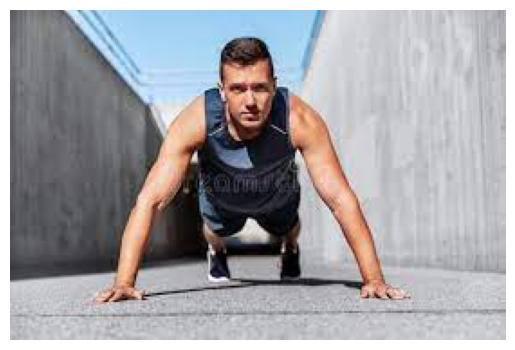

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Загрузка изображения
image = cv2.imread('jpeg2.jfif')
# Отображение изображения
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


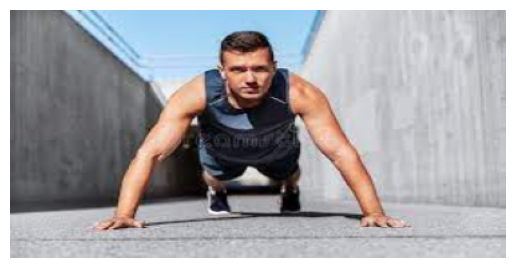

In [ ]:
# Изменение размера изображения
resized_image = cv2.resize(image, (400, 200))
# Преобразование в оттенки серого
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Улучшение контраста
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(gray_image)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

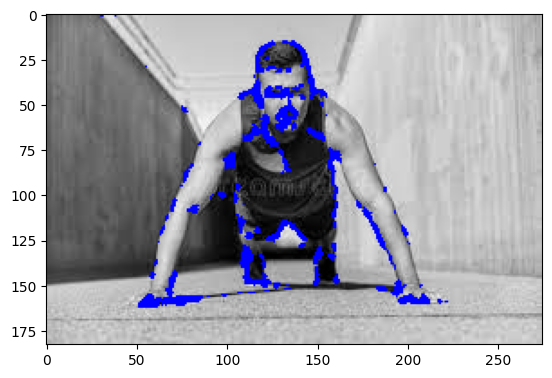

In [ ]:
# Детектор углов Харриса
corners = cv2.cornerHarris(gray_image, 3, 1, 0)
marked_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
marked_image[corners > 0.01 * corners.max()] = [0, 0, 255]
plt.imshow(marked_image)
plt.show()

Метод Харриса
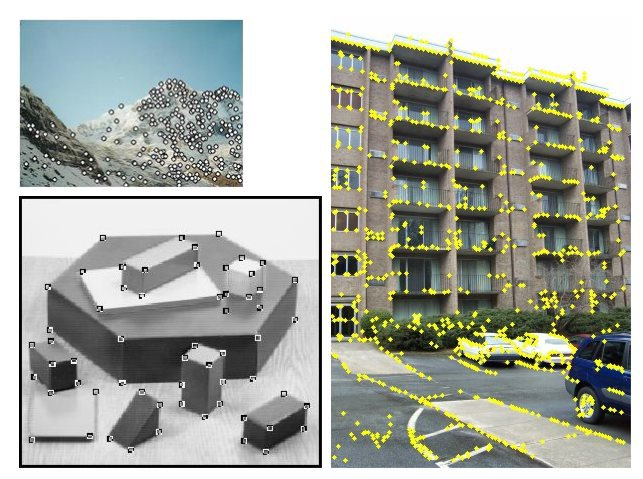

In [ ]:
print(corners.max(),corners[159][50:100])

0.08326689 [4.0807616e-05 4.3919537e-04 1.1607758e-03 3.7650894e-03 5.9214458e-03
 5.4610893e-03 2.3403056e-03 2.3842193e-03 1.9427426e-03 1.0658167e-03
 1.8798010e-03 1.7943964e-03 1.8173346e-03 1.3388072e-03 2.6366606e-03
 3.3992631e-03 4.1707894e-03 3.4077361e-03 5.4496257e-03 5.6653889e-03
 2.6824172e-03 3.8242487e-03 9.2979101e-03 1.0808663e-02 8.6025959e-03
 4.2541185e-03 5.0999373e-03 3.8161201e-03 2.3639661e-03 9.2455361e-04
 8.9205039e-04 1.3859973e-03 1.8611174e-03 1.9491618e-03 1.0013484e-03
 3.3051817e-04 2.0786290e-04 9.6963544e-05 3.9775980e-05 8.3858577e-06
 1.8582600e-06 1.6577413e-06 1.6538205e-06 7.7891167e-07 2.4645065e-06
 6.4762307e-06 1.5388514e-05 4.4082106e-05 5.9532686e-05 4.7346883e-05]


In [ ]:
import skimage as ski
ski.__version__

'0.19.3'

In [ ]:
labels = []
for i in range(len(descriptors)):
    labels.append(f'признак {i}')
print(labels)

['признак 0', 'признак 1', 'признак 2', 'признак 3', 'признак 4', 'признак 5', 'признак 6', 'признак 7', 'признак 8', 'признак 9', 'признак 10', 'признак 11', 'признак 12', 'признак 13', 'признак 14', 'признак 15', 'признак 16', 'признак 17', 'признак 18', 'признак 19', 'признак 20', 'признак 21', 'признак 22', 'признак 23', 'признак 24', 'признак 25', 'признак 26', 'признак 27', 'признак 28', 'признак 29', 'признак 30', 'признак 31', 'признак 32', 'признак 33', 'признак 34', 'признак 35', 'признак 36', 'признак 37', 'признак 38', 'признак 39', 'признак 40', 'признак 41', 'признак 42', 'признак 43', 'признак 44', 'признак 45', 'признак 46', 'признак 47', 'признак 48', 'признак 49', 'признак 50', 'признак 51', 'признак 52', 'признак 53', 'признак 54', 'признак 55', 'признак 56', 'признак 57', 'признак 58', 'признак 59', 'признак 60', 'признак 61', 'признак 62', 'признак 63', 'признак 64', 'признак 65', 'признак 66', 'признак 67', 'признак 68', 'признак 69', 'признак 70', 'признак 71', '

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(descriptors, labels, test_size=0.2,
random_state=42)
# Инициализация и обучение классификатора SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
# Оценка производительности модели
accuracy = svm_classifier.score(X_test, y_test)

In [ ]:
print(accuracy)

0.0


1. Задание

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('jpeg2.jfif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

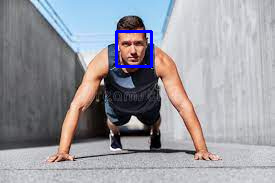

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
   img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
   roi_gray = gray[y:y+h, x:x+w]
   roi_color = img[y:y+h, x:x+w]
   eyes = eye_cascade.detectMultiScale(roi_gray)
   for (ex,ey,ew,eh) in eyes:
       cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. Задание

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Загрузка предварительно обученной модели
model = models.resnet50(pretrained=True)
model.eval()

# Загрузка и предобработка изображения
image_path = 'jpeg2.jfif'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# Передача изображения через модель для извлечения признаков
with torch.no_grad():
    features = model(input_batch)

# Получение извлеченных признаков
features = features.squeeze()

# Вывод извлеченных признаков
print(features)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 139MB/s]


tensor([ 3.0454e+00, -1.5668e+00, -1.4446e+00, -1.3395e+00,  1.1331e+00,
         1.4244e-02, -4.2072e+00, -5.0999e-01, -3.0678e+00, -4.1184e+00,
        -2.2457e+00, -4.2728e+00, -3.5654e+00, -4.0338e+00, -1.9538e+00,
        -3.6830e+00, -4.5769e+00, -2.0486e+00, -2.3663e+00, -2.3720e+00,
        -1.2741e+00,  7.9208e-02, -7.3413e-01, -6.5772e-01, -2.9590e+00,
        -2.2145e+00, -8.6992e-01, -2.2906e+00, -1.9630e+00, -5.0852e-01,
        -2.6828e+00, -4.3402e+00, -1.2867e+00, -2.4223e-01,  1.5842e+00,
        -7.7798e-01, -1.5260e-01, -2.3260e+00, -7.3863e-01, -8.6752e-01,
        -3.3325e+00, -1.5407e+00, -2.5838e+00, -1.1544e-01, -1.5774e-01,
        -1.4274e+00, -3.6479e+00,  2.3818e-01, -2.2229e+00, -2.6251e+00,
        -1.2185e+00,  1.7373e+00, -1.3320e+00, -2.4217e+00, -2.0777e+00,
        -4.9952e+00, -5.3100e+00, -3.8069e+00, -1.8053e+00, -1.6835e+00,
        -1.0068e+00, -1.4246e+00, -3.0353e-01,  1.5052e+00, -1.4134e+00,
        -6.0225e-01, -1.5351e+00, -2.1829e+00, -1.0